Output files will be saved in: /Users/rona/outputs


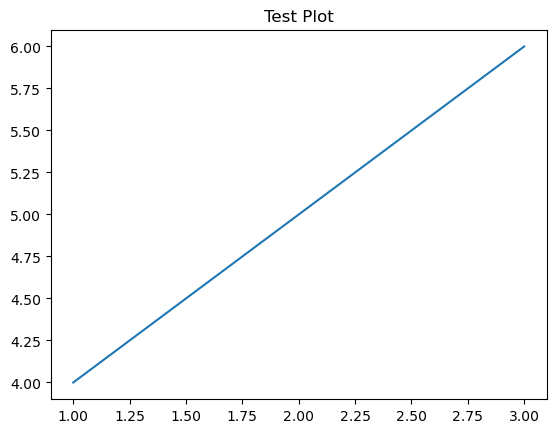

Quantum Circuit:


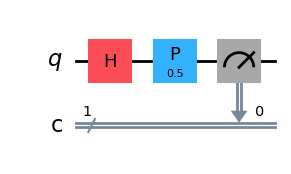

Output Probabilities:


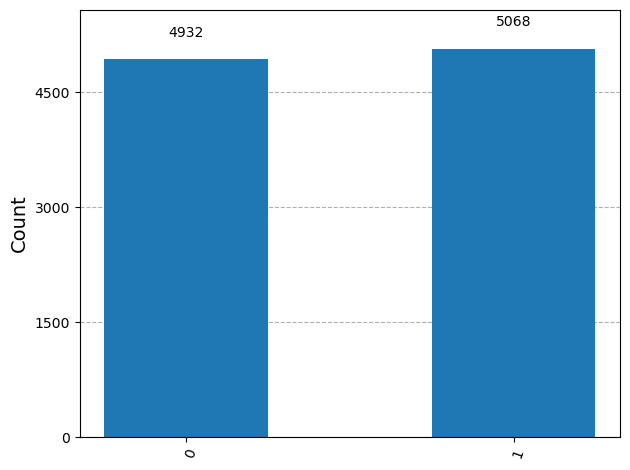

Quantum State Before Measurement:
Statevector([0.70710678+0.j        , 0.62054458+0.33900505j],
            dims=(2,))

Explanations:
1. The Hadamard (H) gate creates superposition from the initial |0> state.
2. The P gate adds a relative phase to simulate interference.
3. The final measurement shows the interference pattern as probabilities of |0> and |1>.
4. The histogram visualizes the probability distribution, indicating quantum interference.



In [3]:
# Quantum Double-Slit Experiment Simulation with Qiskit
# Purpose: Demonstrate superposition and interference with a simple circuit and plot probability distribution

# Ensure Matplotlib displays inline in Jupyter
%matplotlib inline

# Install required packages if needed
# !pip install qiskit qiskit-aer matplotlib pylatexenc

# Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os

# Create output directory and print its location
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
print(f"Output files will be saved in: {os.path.abspath(output_dir)}")

# Test Matplotlib functionality
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.savefig(os.path.join(output_dir, 'test_plot.png'))  # Save test plot
plt.show()

# Create a quantum circuit with one qubit and one classical bit
qc = QuantumCircuit(1, 1)

# Apply Hadamard gate to create superposition
# H gate transforms |0> to (|0> + |1>)/sqrt(2)
qc.h(0)

# Simulate interference by adding a phase gate
# P gate adds a relative phase to |1> to create interference
qc.p(0.5, 0)  # Phase of 0.5 radians

# Measure the qubit
qc.measure(0, 0)

# Draw the quantum circuit (try Matplotlib, fallback to text)
print("Quantum Circuit:")
try:
    qc.draw('mpl', filename=os.path.join(output_dir, 'circuit.png'))  # Save circuit diagram
    plt.show()
except Exception as e:
    print("Error drawing circuit with Matplotlib:", e)
    print("Falling back to text-based circuit drawing:")
    with open(os.path.join(output_dir, 'circuit.txt'), 'w') as f:
        f.write(qc.draw('text'))  # Save text-based circuit
    print(qc.draw('text'))

# Simulate the circuit using AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()

# Extract results
counts = result.get_counts(qc)

# Plot histogram of probabilities
print("Output Probabilities:")
plot_histogram(counts)
plt.savefig(os.path.join(output_dir, 'histogram.png'))  # Save histogram
plt.show()

# Display quantum state to inspect superposition
state = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
print("Quantum State Before Measurement:")
print(state)

# Additional explanations
print("""
Explanations:
1. The Hadamard (H) gate creates superposition from the initial |0> state.
2. The P gate adds a relative phase to simulate interference.
3. The final measurement shows the interference pattern as probabilities of |0> and |1>.
4. The histogram visualizes the probability distribution, indicating quantum interference.
""")